Use the Discrete Fourier Transform to remove spectral noise from the image "Questionario-3-Imagem-4.png".

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
filename = "Questionario-3-Imagem-4"
full_path = f"{filename}.png"

img = cv.imread(full_path,flags=cv.IMREAD_GRAYSCALE)

In [3]:
import copy
def my_dft(image):
    complex_mat = [np.float32(image), np.zeros(image.shape, np.float32)]
    complex_image = cv.merge(complex_mat)
    dft_image = complex_image
    dft_flags = cv.DFT_COMPLEX_OUTPUT
    cv.dft(complex_image, dft_image, flags=dft_flags)
    dft_image = np.fft.fftshift(dft_image)
    return dft_image

def magnitude_dft(image):
    size = (image.shape[0], image.shape[1])
    plane = [np.zeros(size, np.float32), np.zeros(size, np.float32)]
    cv.split(image, plane) #  plane[0] = Re(FT), plane[1] = Im(FT)
    magnitude = np.zeros(size, np.float32) #  Matrix with same size as plane[0] to receive plane's magnitude
    cv.magnitude(plane[0], plane[1], magnitude)

    mat_ones = np.ones(size, dtype=magnitude.dtype) #  Matrix to switch magnitude to logharitmic scale
    cv.add(mat_ones, magnitude, magnitude)
    cv.log(magnitude, magnitude)
    cv.normalize(magnitude, magnitude, 0, 1, cv.NORM_MINMAX)
    return magnitude

def invert_dft(image):
    inverse = copy.deepcopy(image)
    dft_flags = cv.DFT_INVERSE + cv.DFT_COMPLEX_OUTPUT
    cv.dft(inverse,inverse, flags=dft_flags)
    inverse = cv.magnitude(inverse[:,:,0], inverse[:,:,1])
    inverse = cv.normalize(inverse, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
    inverse = cv.rotate(inverse, rotateCode=cv.ROTATE_180)
    return inverse

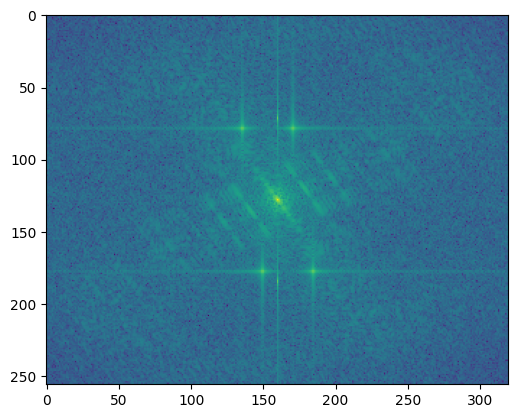

True

In [4]:
freq_domain = my_dft(img)
plt.imshow(magnitude_dft(freq_domain))
plt.show()
cv.imwrite(f"{filename}-fourier-spectrum.tif",magnitude_dft(freq_domain))

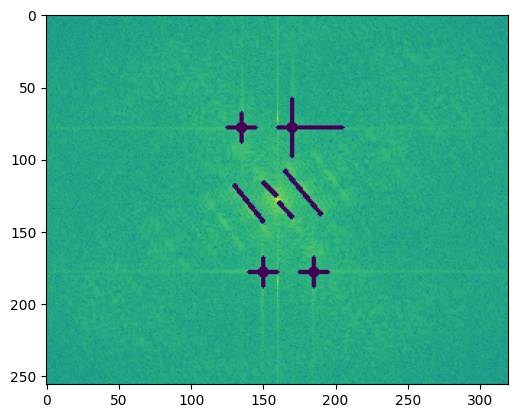

In [5]:
mask = np.full_like(freq_domain, 255)
cx = int(freq_domain.shape[1]/2)
cy = int(freq_domain.shape[0]/2)
radius = 4
color = (0,0,0)
mask = cv.circle(mask, (cx+25, cy+50), radius, color, -1)
mask = cv.circle(mask, (cx-10, cy+50), radius, color, -1)
mask = cv.circle(mask, (cx+10, cy-50), radius, color, -1)
mask = cv.circle(mask, (cx-25, cy-50), radius, color, -1)

mask = cv.line(mask, (cx+15, cy+50), (cx+35, cy+50), color, 2)
mask = cv.line(mask, (cx+25, cy+60), (cx+25, cy+40), color, 2)

mask = cv.line(mask, (cx, cy+50), (cx-20,cy+50), color, 2)
mask = cv.line(mask, (cx-10, cy+40), (cx-10,cy+60), color, 2)

mask = cv.line(mask, (cx, cy-50), (cx+45,cy-50), color, 2)
mask = cv.line(mask, (cx+10, cy-30), (cx+10,cy-70), color, 2)

mask = cv.line(mask, (cx-25, cy-40), (cx-25,cy-60), color, 2)
mask = cv.line(mask, (cx-15, cy-50), (cx-35,cy-50), color, 2)

# diagonal lines

mask = cv.line(mask, (cx-1,cy-3), (cx-10,cy-12), color, 2)
mask = cv.line(mask, (cx+1,cy+2), (cx+10,cy+12), color, 2)

mask = cv.line(mask, (cx+30, cy+10), (cx+5, cy-20), color, 2)
mask = cv.line(mask, (cx-10, cy+15), (cx-30, cy-10), color, 2)

fq_res = mask * freq_domain
cv.imwrite(f"{filename}-fourier-spectrum-with-mask.tif",magnitude_dft(fq_res))
plt.imshow(magnitude_dft(fq_res))

True

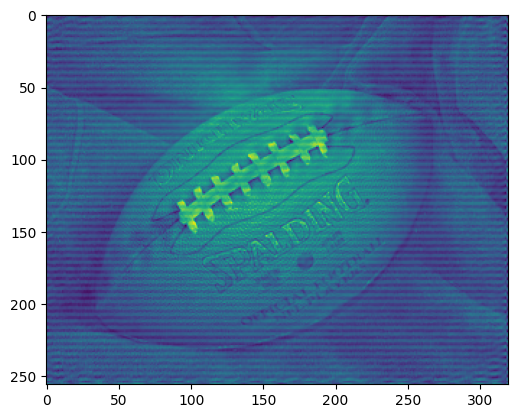

In [6]:
plt.imshow(invert_dft(fq_res))
cv.imwrite(f"{filename}-after-dft.png",invert_dft(fq_res))